In [28]:
import pandas as pd
import re

task = "cifar-10"

# Read the log file
with open(f"logs/{task}.txt", "r") as f:
    lines = f.readlines()

# Store extracted data
epoch_data = []

# Regex to match epoch lines like: Epoch [1/20] - Loss: 4.7830, Accuracy: 2.74%
pattern = re.compile(r"Epoch \[(\d+)/\d+\] - Loss: ([\d.]+), Accuracy: ([\d.]+)%")

for line in lines:
    match = pattern.search(line)
    if match:
        epoch = int(match.group(1))
        loss = float(match.group(2))
        accuracy = float(match.group(3))
        epoch_data.append((epoch, loss, accuracy))

# Create DataFrame
df = pd.DataFrame(epoch_data, columns=["Epoch", "Loss", "Accuracy"])
print(df)

   Epoch    Loss  Accuracy
0      1  0.8284     71.25
1      2  0.4572     85.13
2      3  0.3281     89.44
3      4  0.2554     91.76
4      5  0.2027     93.41
5      6  0.1582     94.84
6      7  0.1295     95.85
7      8  0.1095     96.58


In [29]:
# Step 4: Generate LaTeX table code
latex_code = "\\begin{table}[ht]\n\\centering\n\\begin{tabular}{|c|c|c|}\n\\hline\n"
latex_code += "\\textbf{Epoch} & \\textbf{Loss} & \\textbf{Accuracy (\\%)} \\\\\n\\hline\n"

for _, row in df.iterrows():
    latex_code += f"{int(row['Epoch'])} & {row['Loss']:.4f} & {row['Accuracy']:.2f} \\\\\n"

latex_code += "\\hline\n\\end{tabular}\n"
latex_code += "\\caption{Epoch-wise Loss and Accuracy}\n"
latex_code += "\\label{tab:epoch_metrics}\n\\end{table}"

# Step 5: Output or save
print(latex_code)

\begin{table}[ht]
\centering
\begin{tabular}{|c|c|c|}
\hline
\textbf{Epoch} & \textbf{Loss} & \textbf{Accuracy (\%)} \\
\hline
1 & 0.8284 & 71.25 \\
2 & 0.4572 & 85.13 \\
3 & 0.3281 & 89.44 \\
4 & 0.2554 & 91.76 \\
5 & 0.2027 & 93.41 \\
6 & 0.1582 & 94.84 \\
7 & 0.1295 & 95.85 \\
8 & 0.1095 & 96.58 \\
\hline
\end{tabular}
\caption{Epoch-wise Loss and Accuracy}
\label{tab:epoch_metrics}
\end{table}


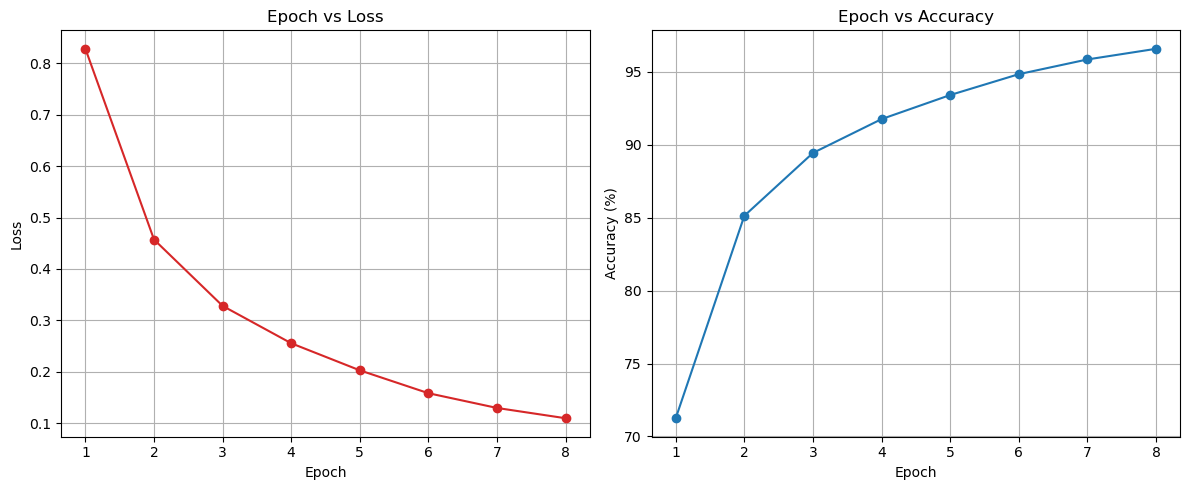

In [30]:
import matplotlib.pyplot as plt


# Assuming df is your DataFrame with columns 'Epoch', 'Loss', 'Accuracy'
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(df['Epoch'], df['Loss'], marker='o', color='tab:red')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(df['Epoch'], df['Accuracy'], marker='o', color='tab:blue')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)

plt.tight_layout()
plt.savefig(task+".jpg")
plt.show()